# Exploratory Data Analysis (EDA) On Airbnb Data 


#Bussiness Statement

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company.

The objective of the project is to perform data visualization techniques to understand the insight of the data. This project aims to apply Exploratory Data Analysis (EDA) and visualization using Python to get a visual understanding of the data.



#Project Objective :-

- Install the require modules
- analysis the data
- Clean the data using various techniques
- Analysis the dataset in accordance to bussiness needs
- Finding various Key Point Of INterest 

### Installed and import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#### Data Preparation and Cleaning
##### In the data cleaning, we Load the dataset into a data frame using Pandas. Explore the number of rows & columns, ranges of values etc. We then Handle missing, incorrect and invalid data and Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.). The further steps are explained along with the code.


In [2]:
from timeit import default_timer as timer
start = timer()
airBnb_DF= pd.read_csv('AB_NYC_2019.csv')
print("Timer :- ", timer() - start)

Timer :-  0.32577809999999374


In [3]:
airBnb_DF.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
print(type(airBnb_DF))
print(airBnb_DF.columns)
print(airBnb_DF.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
(48895, 16)


In [5]:
print("Get size of dataframe before preprocessing :- ", sys.getsizeof(airBnb_DF))

Get size of dataframe before preprocessing :-  24592140


##### Now we check the different types of datatypes for each of the column.

In [6]:
airBnb_DF.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##### After looking at the head of the dataset we already were able to notice some NaN values present in dataframe such as in 'reviews_per_month' column, therefore need to examine missing values further before continuing with analysis.

In [7]:
from timeit import default_timer as timer
start = timer()
print(airBnb_DF.isna().sum())
print("Timer :- ", timer() - start)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
Timer :-  0.02389630000000409


##### In this case, missing data that is observed does not need too much special treatment.The column "host_name" is irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; this column is insignificant therefore those values are not needed.

In [8]:
from timeit import default_timer as timer
start = timer()
airBnb_DF.drop(['host_name', 'last_review'], axis=1, inplace = True)
print("Timer :- ", timer() - start)

Timer :-  0.008898900000005483


In [9]:
airBnb_DF.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


##### We now look at the availability of the airbnb.There are some airbnb's which are available for 0 days. Although this is allowed the number of reviews on them had a value. Which means the airbnb has been reviewed even without somebody staying in there. Hence, these values are dropped from the list.


In [10]:
from timeit import default_timer as timer
start = timer()
for i in range (len(airBnb_DF)):
    if airBnb_DF.availability_365[i] == 0 and airBnb_DF.number_of_reviews[i] != 0:
        airBnb_DF.drop([i], inplace = True)
print(timer() - start)

126.73422729999999


In [11]:
airBnb_DF.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [12]:
(airBnb_DF==0).sum()

id                                    0
name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 9
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                   4845
dtype: int64

##### For "review_per_month" column we can simply append it with 0.0 for missing values instead of 'NAN' values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 "rate of reviews per month".

In [13]:
from timeit import default_timer as timer
start = timer()
airBnb_DF.fillna({'reviews_per_month':0}, inplace=True)
print("Timer:- ", timer() - start)

Timer:-  0.0029117999999925814


In [14]:
airBnb_DF.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [15]:
airBnb_DF.reviews_per_month.isna().sum()

0

In [16]:
airBnb_DF.isna().sum()

id                                 0
name                              12
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [17]:
airBnb_DF.shape

(36207, 14)

##### After preprocessing we can observe that the size of dataframe is reduced.

In [18]:
print("After preprocessing the size of dataframe is :- ", sys.getsizeof(airBnb_DF))

After preprocessing the size of dataframe is :-  15117520


##### Now we see the unique values of neighbourhoods group as this column will appear very handy for later analysis .


In [19]:
airBnb_DF.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

##### Examining the unique values of room_type as this column will appear very handy for later analysis.


In [20]:
airBnb_DF.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Exploratory Analysis and Visualization


#### The most common room types.

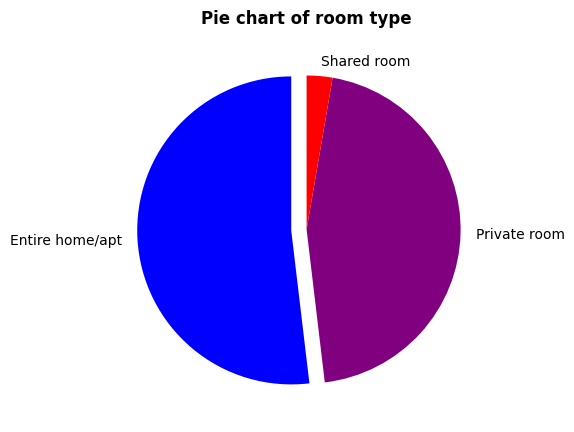

Timer:-  0.3184082000000217


In [21]:
from timeit import default_timer as timer
start = timer()
room_type = airBnb_DF.room_type.value_counts()
room_type.plot(kind='pie', figsize=(5,5), title='Most frequent room types', fontsize=10, explode=(0.1,0,0), startangle=90, colors=['blue','purple','red'])
plt.title('Pie chart of room type', fontweight='bold', pad=10)
plt.ylabel(" ")
plt.show()
print("Timer:- ", timer() - start)

#### The most common neighbourhood_group.

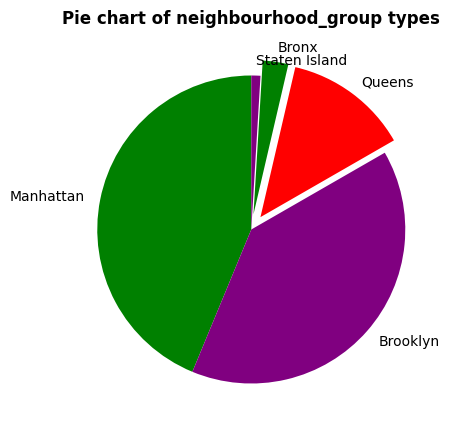

Timer:-  0.2428241000000071


In [22]:
from timeit import default_timer as timer
start = timer()
neighbourhood_Group = airBnb_DF.neighbourhood_group.value_counts()
neighbourhood_Group.plot(kind='pie', figsize=(5,5), title='Most frequent neighbourhood_group types', fontsize=10, explode=(0,0,0.1,0.1,0), startangle=90, colors=['green','purple','red'])
plt.title('Pie chart of neighbourhood_group types', fontweight='bold', pad=10)
plt.ylabel(" ")
plt.show()
print("Timer:- ", timer() - start)

#### Host ids vs the number of airbnbs that under each of the hosts

host_id
219517861    327
107434423    232
30283594     121
137358866     98
12243051      96
16098958      95
61391963      87
22541573      85
200380610     65
1475015       52
Name: count, dtype: int64
Timer:-  0.15064750000010463


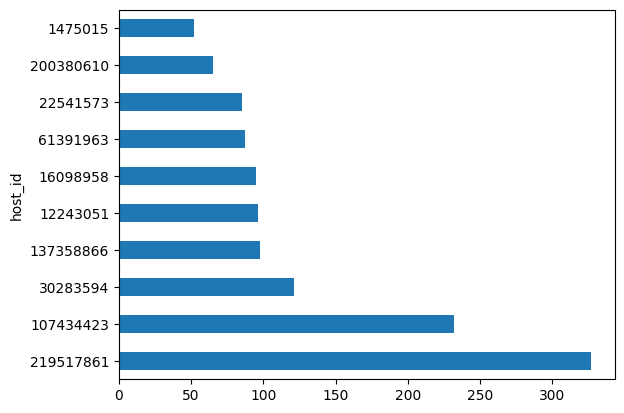

In [23]:
from timeit import default_timer as timer
start = timer()
hi = airBnb_DF.host_id.value_counts().head(10)
print(hi)
airBnb_DF.host_id.value_counts().head(10).plot(kind='barh')
print("Timer:- ", timer() - start)

#### neighbourhood_group wise distribution of airbnbs

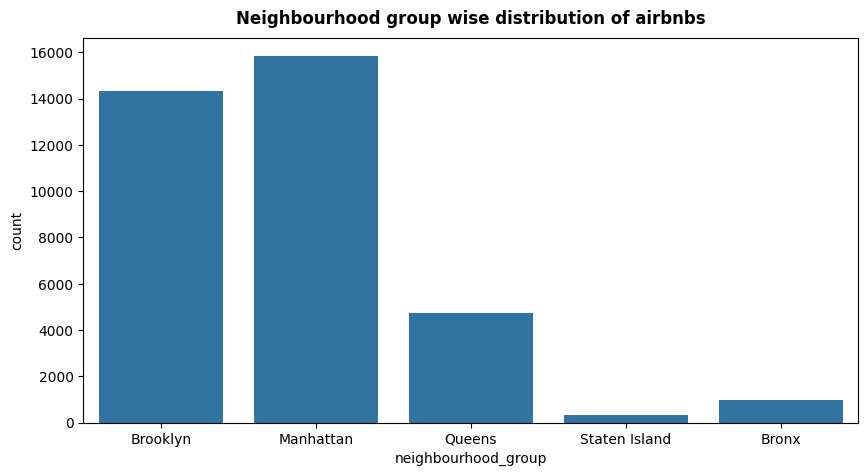

Timer:-  0.5203973999999789


In [24]:
from timeit import default_timer as timer
start = timer()
plt.figure(figsize=(10,5))
sns.countplot(x='neighbourhood_group', data=airBnb_DF)
plt.title('Neighbourhood group wise distribution of airbnbs', fontweight='bold', pad=10)
plt.show()
print("Timer:- ", timer() - start)

#### room_type distribution of airbnbs

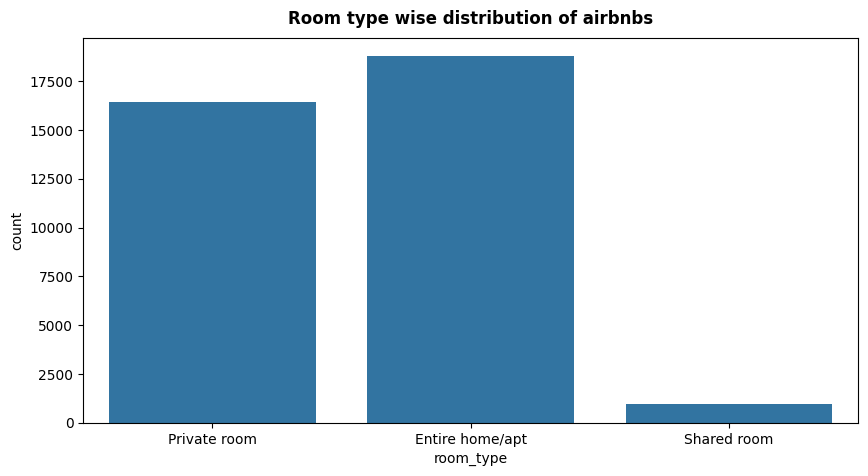

Timer:-  0.5346680999999762


In [25]:
from timeit import default_timer as timer
start = timer()
plt.figure(figsize=(10,5))
sns.countplot(x='room_type', data=airBnb_DF)
plt.title('Room type wise distribution of airbnbs', fontweight='bold', pad=10)
plt.show()
print("Timer:- ", timer() - start)

#### Top5 and Top10 most reviewed neighbourhoods


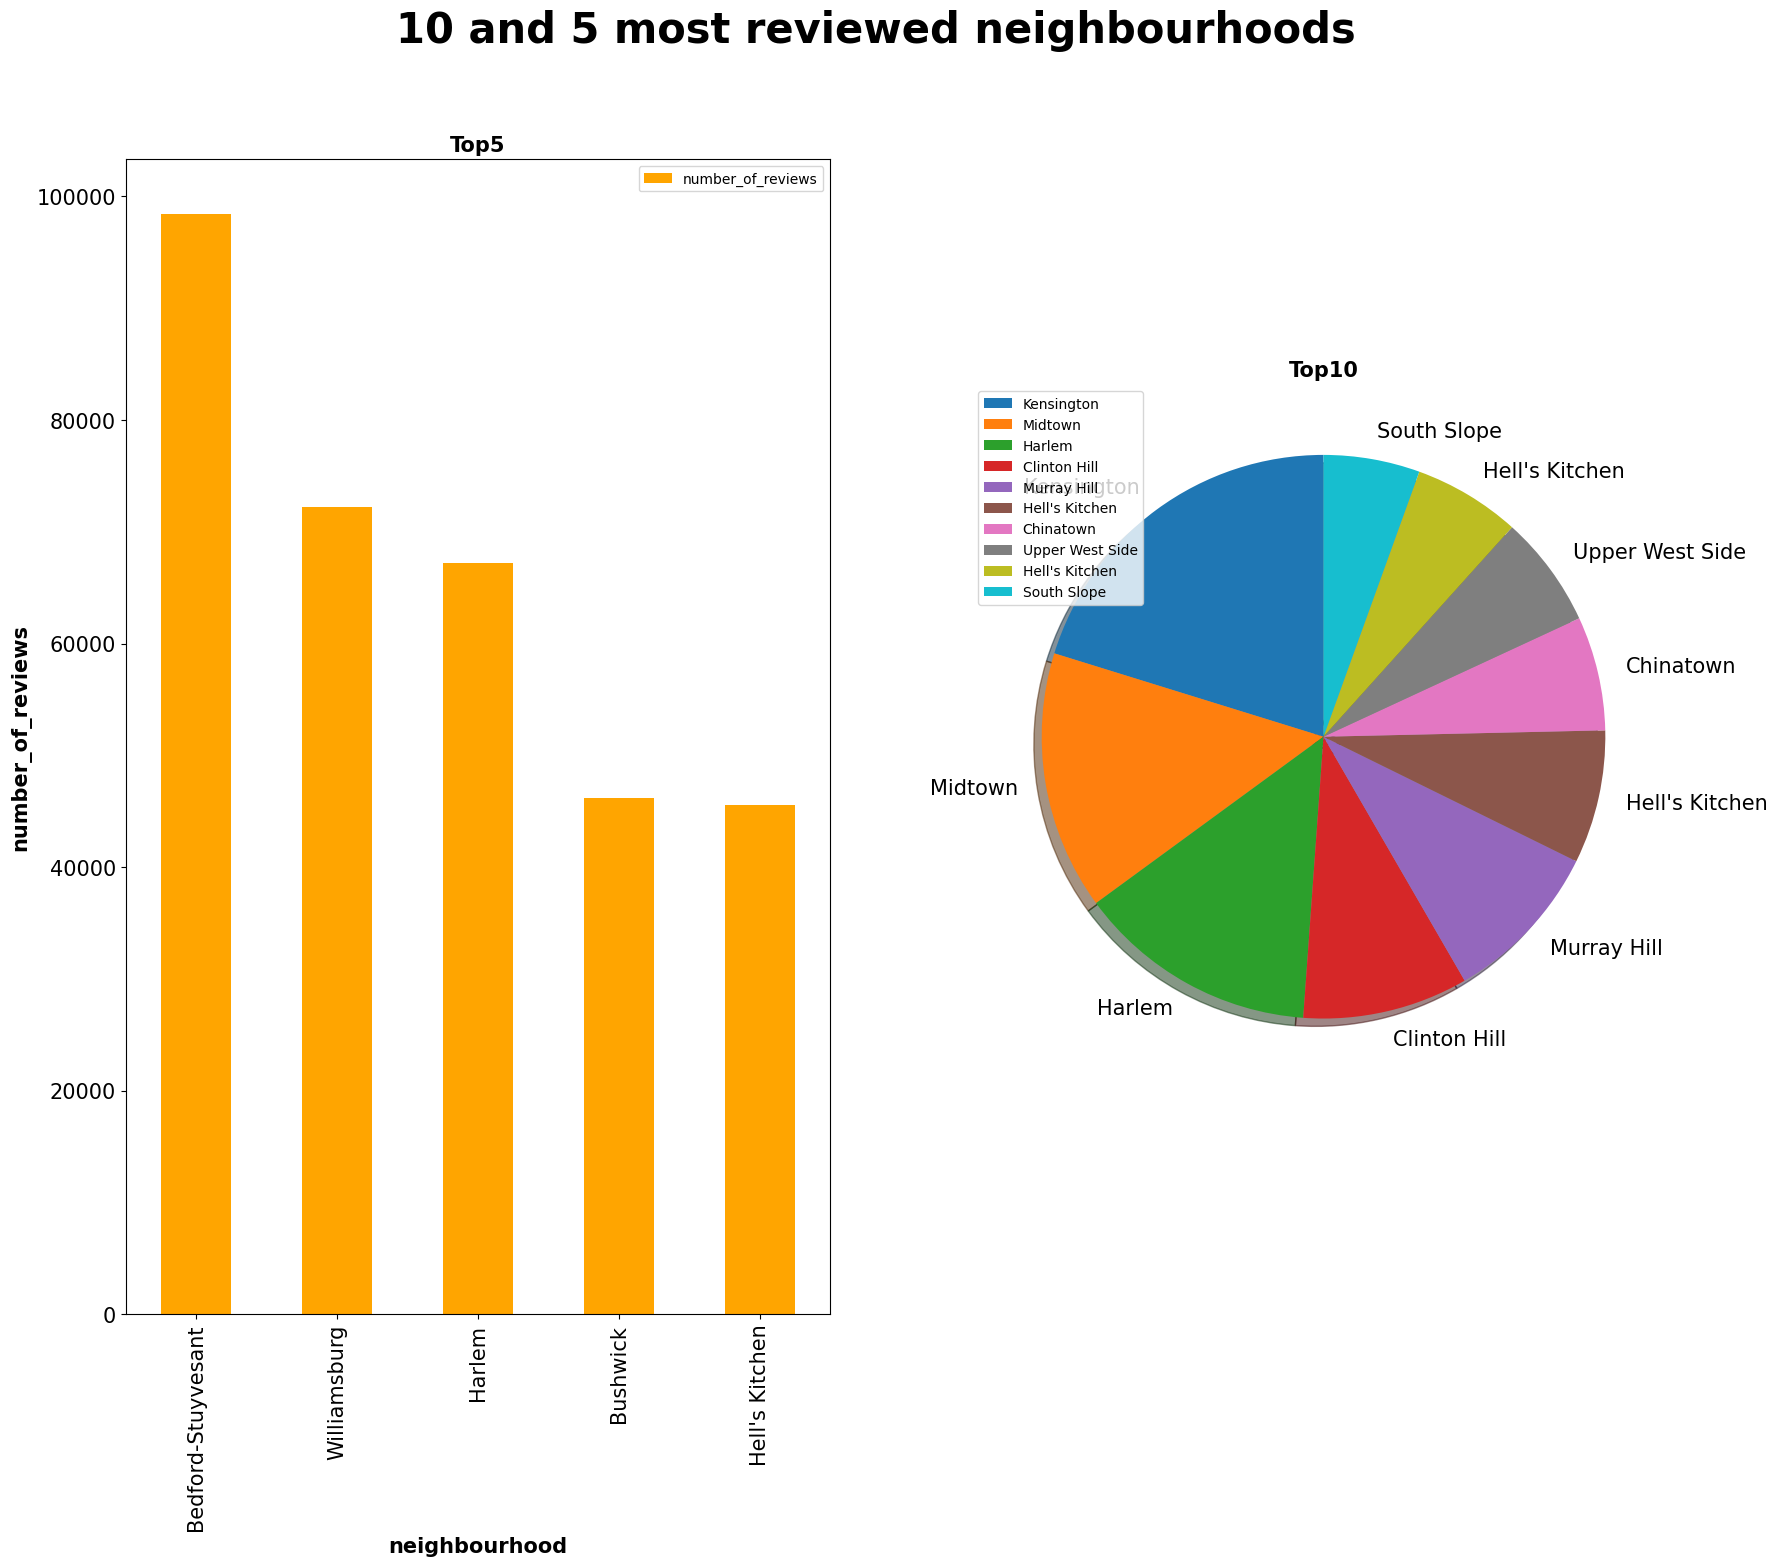

In [26]:
review_df = airBnb_DF[['neighbourhood', 'number_of_reviews']].groupby ('neighbourhood', as_index=False).sum()
review = review_df.sort_values(['number_of_reviews'], ascending=False)

explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0,0)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('10 and 5 most reviewed neighbourhoods', fontweight='bold', fontsize=30)

### Top5
review.head(5).plot.bar(x='neighbourhood', y='number_of_reviews', color='orange', figsize=(20,15), fontsize=15, ax=ax1)
ax1.set_title('Top5', fontweight='bold', fontsize=15)
ax1.set_xlabel('neighbourhood', fontweight='bold', fontsize=15)
ax1.set_ylabel('number_of_reviews', fontweight='bold', fontsize=15)

### Top10
review.head(10).plot(kind='pie', x='neighbourhood', y='number_of_reviews', figsize=(20,15), fontsize=15, startangle=90, shadow=True, labels=airBnb_DF.neighbourhood, ax=ax2)
ax2.set_title('Top10', fontweight='bold', fontsize=15)
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')

fig.subplots_adjust(hspace=1.0)

#### Category count plot between room type and neighbourhood group


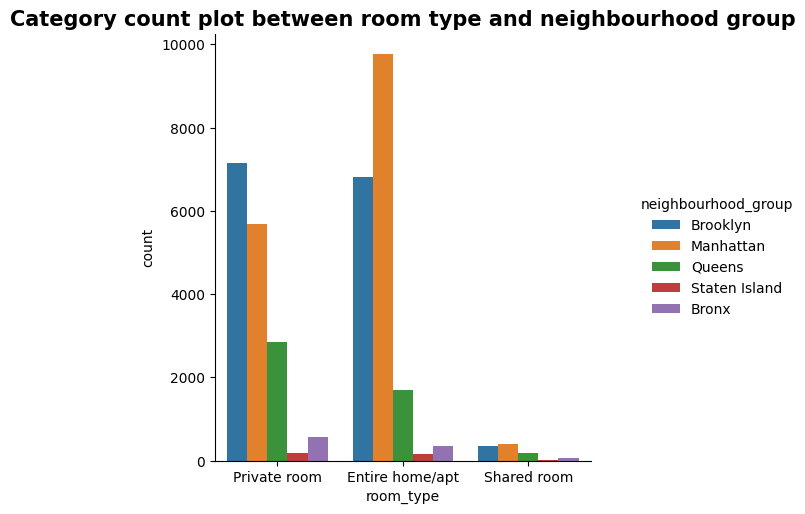

In [27]:
sns.catplot(x='room_type', kind='count', hue='neighbourhood_group', data=airBnb_DF)
plt.title('Category count plot between room type and neighbourhood group', fontweight='bold', fontsize=15)
plt.show()


#### Most expensive room type

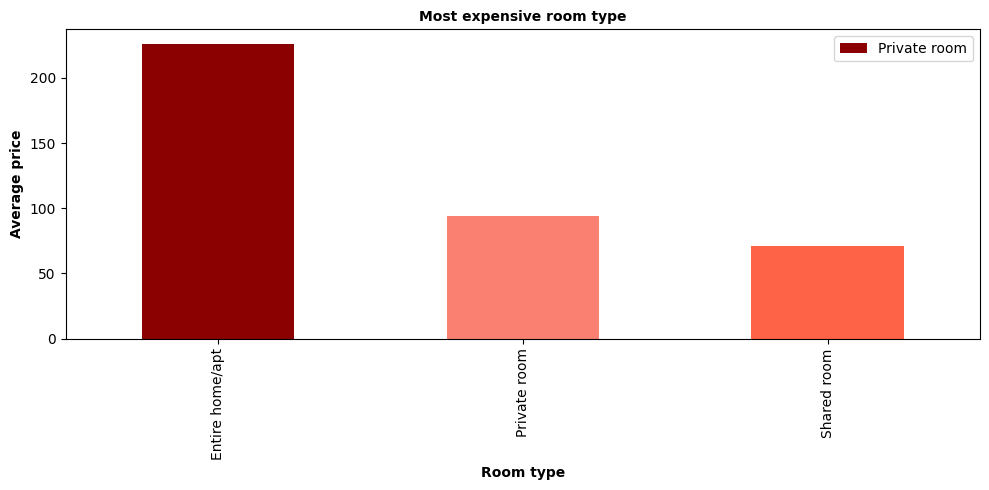

In [28]:
room_type_df1 = airBnb_DF[['room_type','id','price']]
#room_type_df.drop_duplicates(subset='id',inplace=True)
room_type = room_type_df1.groupby(by=['room_type'], as_index=False).agg({'price':'mean'}).sort_values('price', ascending=False, ignore_index=True)
room_type.plot(kind='bar', x='room_type', y='price', color=['darkred','salmon','tomato'], figsize=(10,5), fontsize=10)
plt.title('Most expensive room type', fontweight='bold', fontsize=10)
plt.xlabel('Room type', fontweight='bold', fontsize=10)
plt.ylabel('Average price', fontweight='bold', fontsize=10)
plt.legend(airBnb_DF.room_type, loc='best')
plt.tight_layout()
plt.show()

#### Neighbourhoods with the most entries

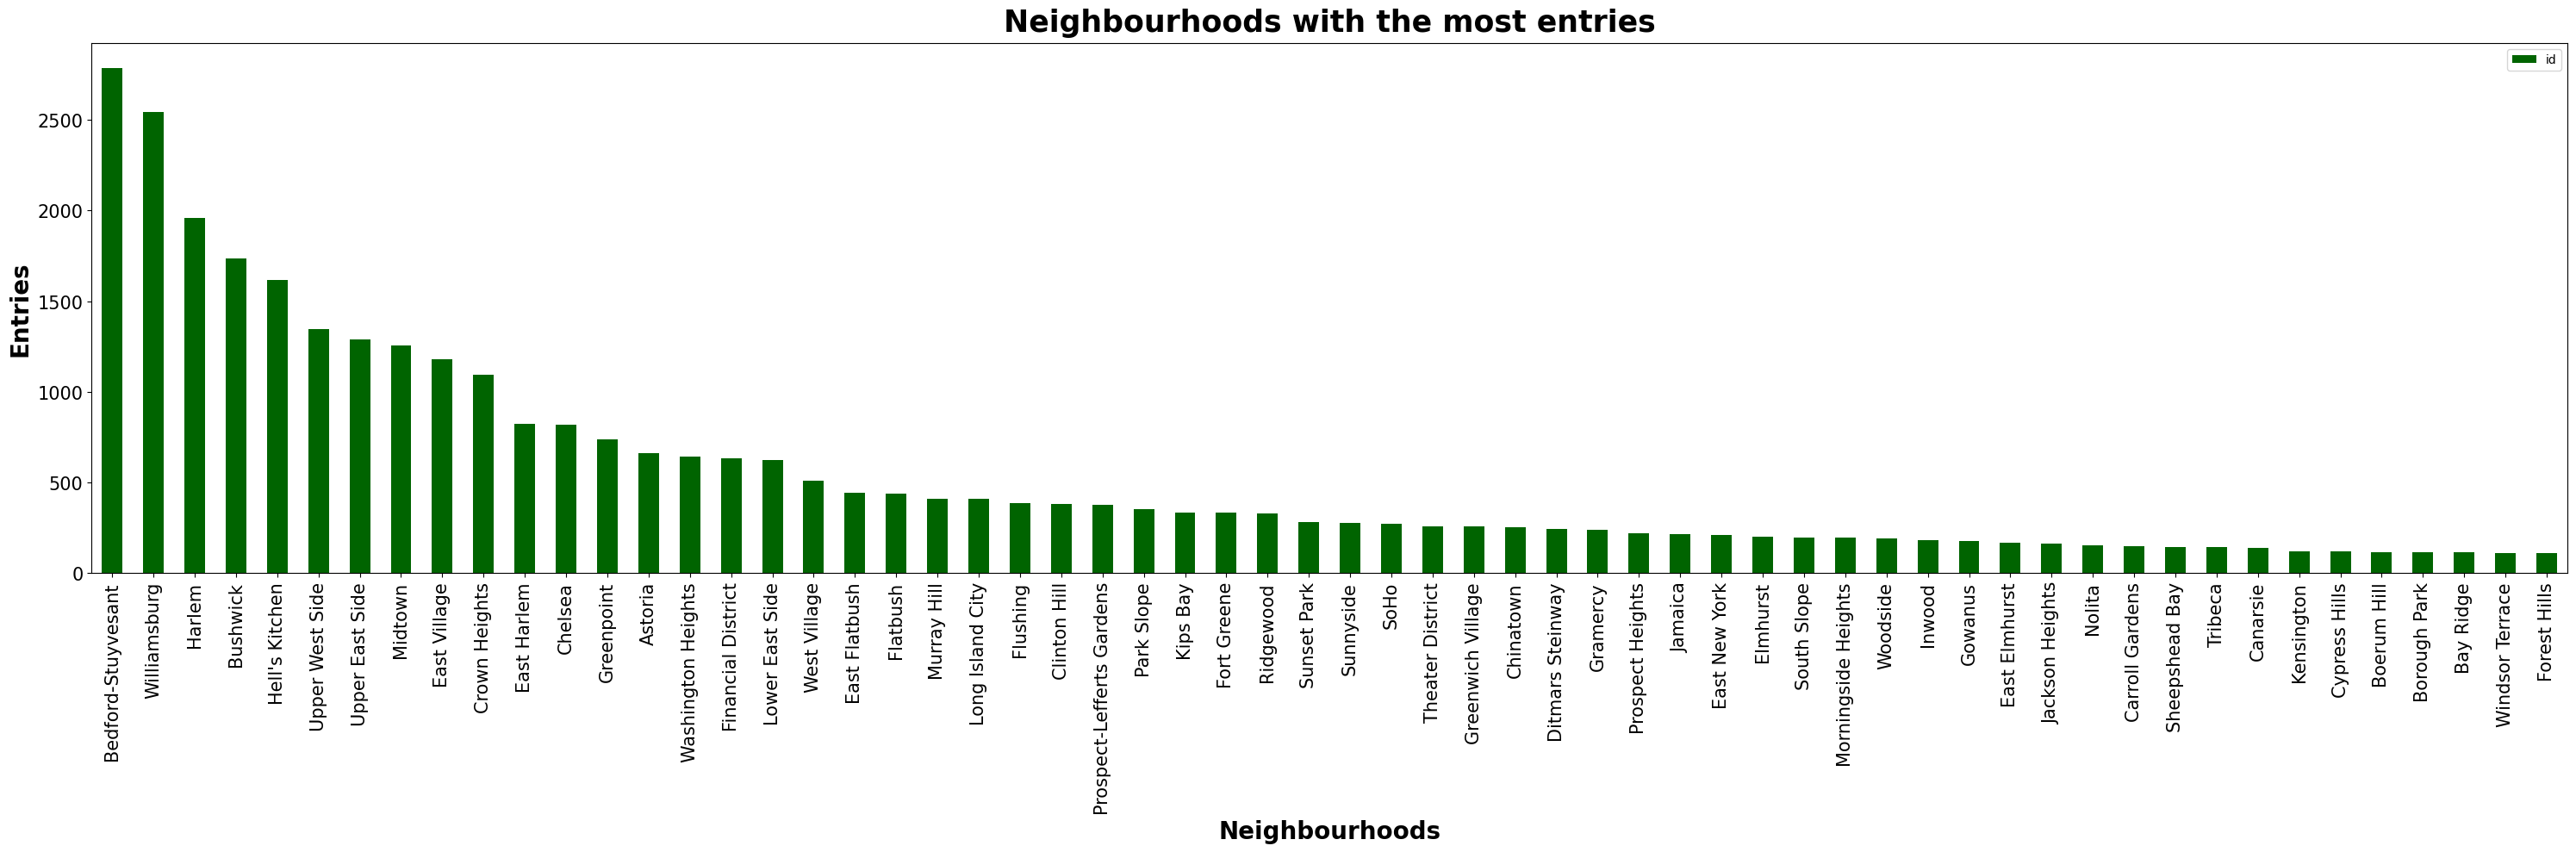

In [29]:
neighbourhood_df = airBnb_DF.groupby(by=['neighbourhood'], as_index=False).agg({'id':'nunique'}).sort_values('id', ascending=False, ignore_index=True)
neighbourhood_df.head(60).plot.bar(x='neighbourhood',color='darkgreen',fontsize=15,figsize=(30,10))
plt.title('Neighbourhoods with the most entries',fontweight='bold',fontsize=25,pad=10)
plt.ylabel('Entries',fontweight='bold',fontsize=20)
plt.xlabel('Neighbourhoods',fontweight='bold',fontsize=20)
plt.tight_layout()
plt.show()

#### Word cloud of the words used names of the Airbnbs


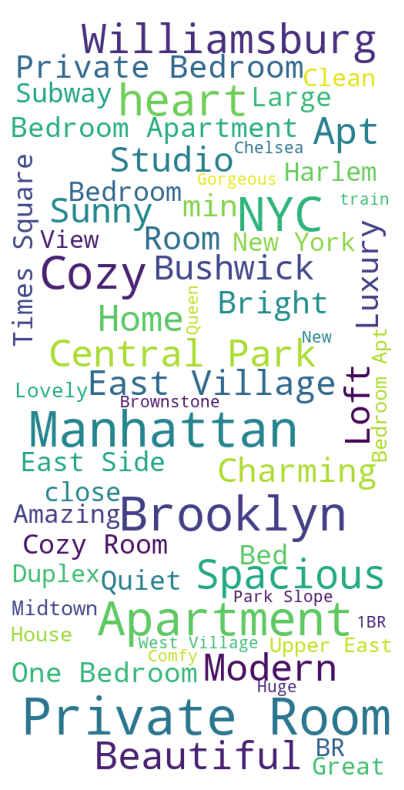

In [32]:
from wordcloud import WordCloud
name1 = " ".join(str(w) for w in airBnb_DF.name)
plt.subplots(figsize=(25,10))
wordcloud = WordCloud(background_color='white', height=1000, width=500, max_words=60).generate(name1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### What are the neighbourhoods or the neighbourhood groups where the owners are preffering longer stays rather than one shorter inn type stays?

In [33]:
airBnb_DF.groupby('neighbourhood')['minimum_nights'].mean()

neighbourhood
Allerton            2.184211
Arden Heights      12.000000
Arrochar            2.761905
Arverne             1.648649
Astoria             6.536364
                     ...    
Windsor Terrace     7.883929
Woodhaven           2.762500
Woodlawn            1.444444
Woodrow             7.000000
Woodside           11.237113
Name: minimum_nights, Length: 220, dtype: float64

In [34]:
airBnb_DF.groupby('neighbourhood_group')['minimum_nights'].mean()

neighbourhood_group
Bronx             4.830072
Brooklyn          6.753579
Manhattan        10.071771
Queens            5.371060
Staten Island     4.893064
Name: minimum_nights, dtype: float64

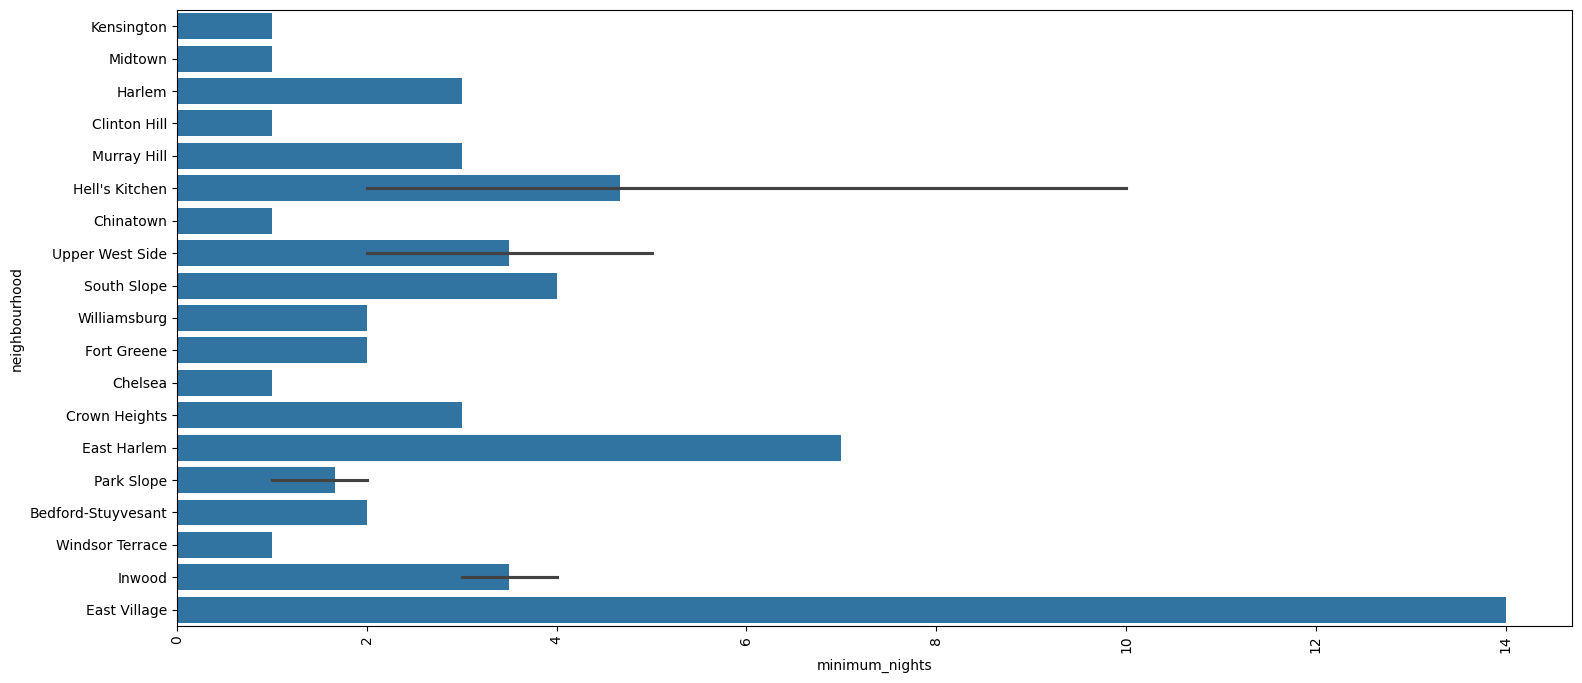

In [35]:
plt.figure(figsize=(18,8))
sns.barplot(x=airBnb_DF.minimum_nights[:25], y=airBnb_DF.neighbourhood[:25])
plt.xticks(rotation=90)
plt.show()

In [36]:
airBnb_DF.groupby('room_type')['minimum_nights'].mean()

room_type
Entire home/apt    9.777387
Private room       5.937051
Shared room        6.896834
Name: minimum_nights, dtype: float64

#### If airbnb wants to start their own set of apartment type(OYO townhouse) places what place is the best for the company?


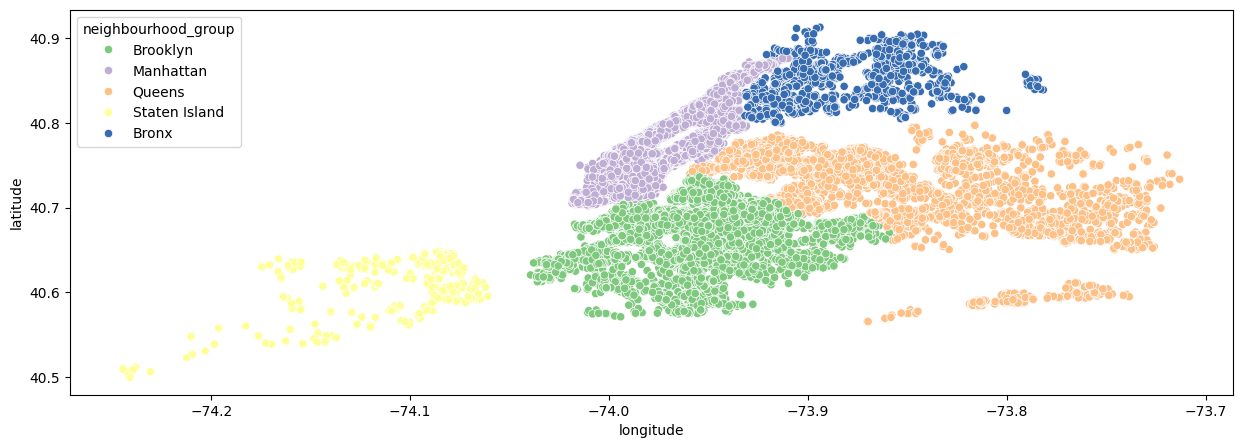

In [38]:
#viasualizinf the newyork map from the goven data
plt.figure(figsize=(15,5))
sns.scatterplot(x=airBnb_DF.longitude, y=airBnb_DF.latitude, hue=airBnb_DF.neighbourhood_group,palette='Accent')
plt.show()

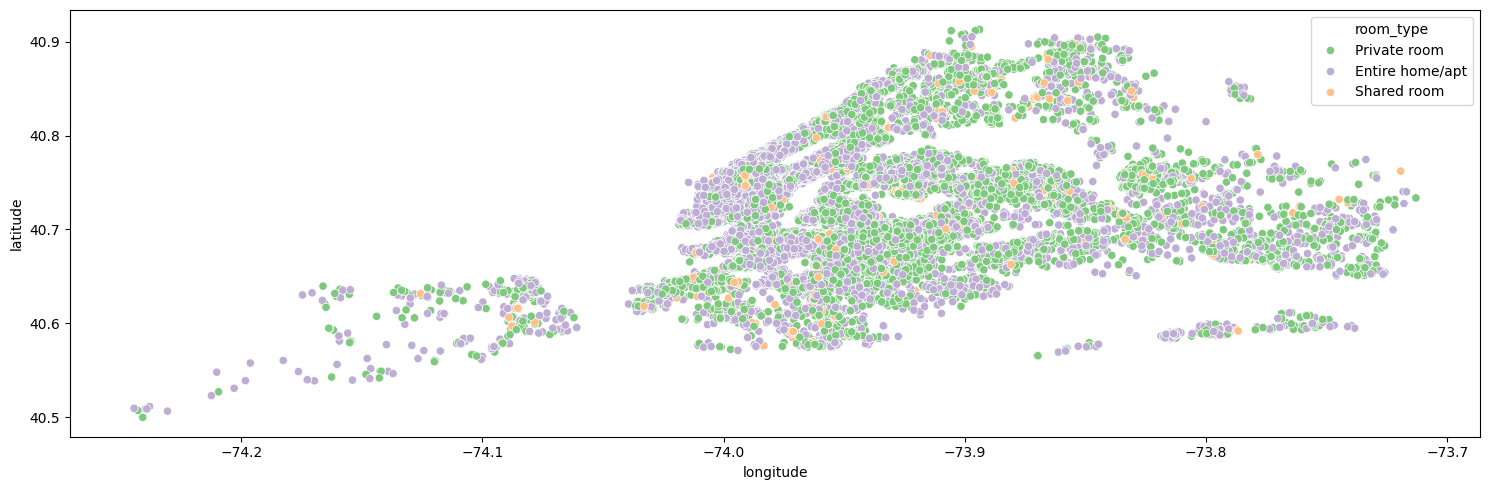

In [39]:
#viasualizinf the newyork map from the goven data
plt.figure(figsize=(15,5))
sns.scatterplot(x=airBnb_DF.longitude, y=airBnb_DF.latitude, hue=airBnb_DF.room_type,palette='Accent')
plt.tight_layout()
plt.show()